In [126]:
import MDAnalysis as mda

topology_path = "./ala2_cg.pdb"
traj_path = "./ala2_cg.xtc"
u = mda.Universe(topology_path, traj_path)

/home/mori/miniforge3/envs/md/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/mori/miniforge3/envs/md/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: X
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mori/miniforge3/envs/md/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [127]:
from MDAnalysis.analysis.dihedrals import Dihedral
R = Dihedral([u.select_atoms("index 0-3"), u.select_atoms("index 1-4")]).run()

/home/mori/miniforge3/envs/md/lib/python3.9/site-packages/MDAnalysis/analysis/dihedrals.py:315: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)
/tmp/ipykernel_11575/944138914.py:11: RuntimeWarning: invalid value encountered in divide
  hist = ax.pcolormesh(X, Y, -1*k * temp * np.log(H / sum(H)).T / 1000, cmap="magma")
/tmp/ipykernel_11575/944138914.py:11: RuntimeWarning: divide by zero encountered in log
  hist = ax.pcolormesh(X, Y, -1*k * temp * np.log(H / sum(H)).T / 1000, cmap="magma")


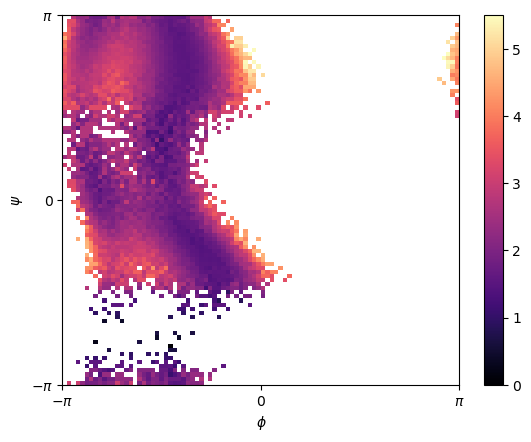

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import math

temp = 300
k = 1.99  # cal/(K・mol)
fig = plt.figure()
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(R.angles[:, 0], R.angles[:, 1], bins=(90, 90))
X, Y = np.meshgrid(np.deg2rad(xedges), np.deg2rad(yedges))
hist = ax.pcolormesh(X, Y, -1*k * temp * np.log(H / sum(H)).T / 1000, cmap="magma")
# ax.scatter(
#     np.deg2rad(R.angles[:, 0]),
#     np.deg2rad(R.angles[:, 1]),
#     s=20,
#     color="tab:gray",
#     alpha=0.3,
#     edgecolors="None",
# )
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\psi$")
ax.set_xticks([-math.pi, 0, math.pi], [r"$-\pi$", "0", r"$\pi$"])
ax.set_yticks([-math.pi, 0, math.pi], [r"$-\pi$", "0", r"$\pi$"])
plt.colorbar(hist, ax=ax)